In [1]:
import pandas as pd
import nltk
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [24]:
data.fillna(' ', inplace= True)

In [25]:
data.iloc[0,:]

id                                                              0
qid1                                                            1
qid2                                                            2
question1       What is the step by step guide to invest in sh...
question2       What is the step by step guide to invest in sh...
is_duplicate                                                    0
q1              what is the step by step guide to invest in sh...
Name: 0, dtype: object

In [26]:
data.loc[0,['question1','question2']]

question1    What is the step by step guide to invest in sh...
question2    What is the step by step guide to invest in sh...
Name: 0, dtype: object

In [27]:
print(data.loc[0,'question1'])

What is the step by step guide to invest in share market in india?


In [28]:
print(data.loc[1,'question1'])

What is the story of Kohinoor (Koh-i-Noor) Diamond?


In [29]:
duplicates = data[data['is_duplicate'] == 1]

In [30]:
duplicates.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,astrology i am a capricorn sun cap moon and c...
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,how can i be a good geologist
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1,how do i read and find my youtube comments
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1,what can make physics easy to learn
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1,what was your first sexual experience like


In [31]:
import string

In [32]:
no_punc = str.maketrans(string.punctuation,' '*len(string.punctuation))
data['q1'] = data['question1'].str.lower().str.translate(no_punc)

In [33]:
data['q2'] = data['question2'].str.lower().str.translate(no_punc)

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop = nltk.corpus.stopwords.words('english')

In [36]:
stop[:5]

['i', 'me', 'my', 'myself', 'we']

In [39]:
def common_words(row):
    q1_word = row['q1'].split()
    q2_word = row['q2'].split()
    common_words = [word for word in q1_word if word not in stop and word in q2_word]
    return len(common_words)

In [40]:
data['common_words'] = data.apply(common_words, axis = 1)

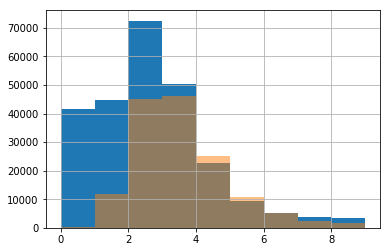

In [45]:
data[data['is_duplicate'] == 0]['common_words'].hist(bins = range(0,10))
data[data['is_duplicate'] == 1]['common_words'].hist(bins = range(0,10), alpha = 0.5)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = data['common_words']
y = data['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.linear_model import LogisticRegression as LR

In [66]:
y_train.head()

341139    0
246092    1
165116    1
316811    1
240899    1
Name: is_duplicate, dtype: int64

In [60]:
X_train.head()

341139    1
246092    2
165116    2
316811    3
240899    4
Name: common_words, dtype: int64

In [64]:
X_train.values

array([1, 2, 2, ..., 1, 2, 2])

In [62]:
X_train.values.reshape(-1,1)

array([[1],
       [2],
       [2],
       ..., 
       [1],
       [2],
       [2]])

In [50]:
reg = LR()

In [68]:
reg.fit(X_train.values.reshape(-1,1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
from sklearn.metrics import log_loss

In [55]:
y_pred = reg.predict_proba(X_test.values.reshape(-1,1))

In [56]:
y_pred

array([[ 0.47801962,  0.52198038],
       [ 0.7270882 ,  0.2729118 ],
       [ 0.47801962,  0.52198038],
       ..., 
       [ 0.7767573 ,  0.2232427 ],
       [ 0.47801962,  0.52198038],
       [ 0.7270882 ,  0.2729118 ]])

In [58]:
log_loss(y_test,y_pred[:,1])

0.63282828677427827

In [41]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1,q2,common_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,6
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,2
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,2
